In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import requests

import mnist_input_data

In [2]:
!pwd

/home/ubuntu/infer/client_grpc/data


In [4]:
reqs = pd.read_csv('response_times.csv', index_col='Unnamed: 0')

In [5]:
reqs.describe()

,100,200,300,500,1000,1500,2000,2500,3000,3500,4000
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,9670.000000,9898.000000,9821.000000,9841.000000
mean,0.063364,0.130143,0.207912,0.351773,0.608542,0.822888,1.079696,1.141415,1.443279,1.462911,1.814589
std,0.009632,0.019216,0.029705,0.065758,0.165676,0.265517,0.447109,0.522416,0.614255,0.591960,0.824004
min,0.005794,0.002644,0.002575,0.002985,0.003524,0.003644,0.003014,0.003432,0.004558,0.002766,0.004608
25%,0.057711,0.122180,0.200169,0.337192,0.604381,0.675307,0.797982,0.810528,0.953081,1.059483,1.241902
50%,0.063088,0.131621,0.209478,0.365734,0.679672,0.971215,1.170154,1.374873,1.661655,1.642663,1.841444
75%,0.069281,0.141011,0.220993,0.392560,0.700816,1.000001,1.485968,1.573849,1.974849,1.962244,2.588953
max,0.142926,0.241925,0.388216,0.804553,0.964128,1.061612,2.171691,1.720475,2.687686,2.191722,3.518893


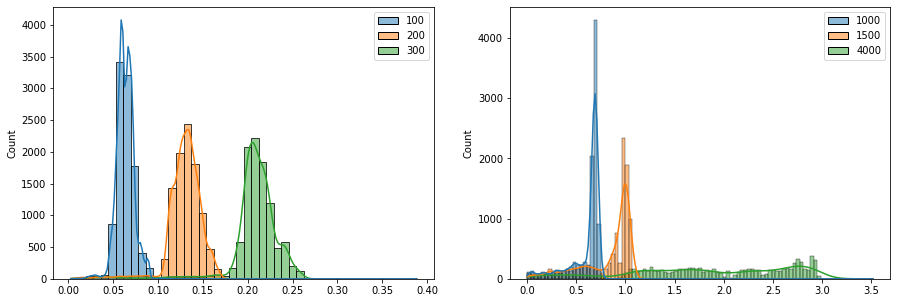

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(15,5))
_ = sns.histplot(data=reqs[['100', '200', '300']], kde=True, ax=ax[0])
_ = sns.histplot(data=reqs[['1000', '1500', '4000']], kde=True, ax=ax[1])


In [7]:
# Test another run
reqs = pd.read_csv('response_times.csv', index_col='Unnamed: 0')
reqs.describe()

,100,200,300,500,1000,1500,2000,2500,3000,3500,4000
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,9852.000000,9667.000000,9606.000000
mean,0.060595,0.130732,0.178714,0.303443,0.615007,0.812973,0.992616,1.267018,1.474396,1.585047,1.438284
std,0.008648,0.017395,0.026102,0.065380,0.175589,0.277645,0.381082,0.582938,0.611192,0.703136,0.574487
min,0.005957,0.002767,0.002753,0.004079,0.003102,0.003743,0.003223,0.002975,0.003865,0.008264,0.002266
25%,0.054345,0.123485,0.172347,0.302909,0.572539,0.645520,0.699598,0.855450,0.957718,1.005741,1.138226
50%,0.057965,0.129995,0.179027,0.319473,0.670833,0.923044,1.198304,1.434318,1.661300,1.808804,1.557183
75%,0.066957,0.140634,0.194934,0.337792,0.728173,1.024705,1.294397,1.821969,2.048677,2.172769,1.939446
max,0.114348,0.252896,0.350669,0.648842,1.074313,1.166476,1.356335,2.005320,2.629712,2.537487,2.316876


In [18]:
host = '128.214.252.11'
port = '8501'
batch_size = 1
image_path = "./mnist_image.pkl"
model_name = 'mnist'
signature_name = 'predict_images'


In [7]:
work_dir='/tmp'

In [8]:
test_data_set = mnist_input_data.read_data_sets(work_dir).test

Extracting /tmp/train-images-idx3-ubyte.gz
Extracting /tmp/train-labels-idx1-ubyte.gz
Extracting /tmp/t10k-images-idx3-ubyte.gz
Extracting /tmp/t10k-labels-idx1-ubyte.gz


In [9]:
img, label = test_data_set.next_batch(1)
img.shape

(1, 784)

In [10]:
# Fetch some images for inference

batch_size = 1
batch = np.repeat(img, batch_size, axis=0).tolist()

In [19]:
# When creating the json object, the signature name field is important otherwise the request does not succeed

json_data = {
    "signature_name": 'predict_images',
    "instances": batch
}

In [24]:
# Works when tested with local host but something seems to block the use of IP address
response_prediction = requests.post('http://128.214.252.11:8501/v1/models/mnist:predict', json=json_data)
print(response_prediction.status_code)
print(response_prediction.json())
# Predict returns the probabilities of the classes 0-9, so we need to pick the highest probability
np.argmax(response_prediction.json()['predictions'][0])

200
{'predictions': [[2.04608477e-05, 1.72721548e-09, 7.74099099e-05, 0.00364778261, 1.25222937e-06, 2.27522032e-05, 1.14668977e-08, 0.99597472, 3.68833389e-05, 0.000218785644]]}


7

In [22]:
response_prediction.

{'predictions': [[2.04608477e-05,
   1.72721548e-09,
   7.74099099e-05,
   0.00364778261,
   1.25222937e-06,
   2.27522032e-05,
   1.14668977e-08,
   0.99597472,
   3.68833389e-05,
   0.000218785644]]}

In [ ]:
reqs_grprc = pd.read_csv('resp_10.csv', index_col='Unnamed: 0')

In [9]:
pd.Series(np.load('resp_100.npy'))

0     0.003486
1     0.005763
2     0.006556
3     0.011348
4     0.008767
        ...   
95    0.017756
96    0.017404
97    0.017190
98    0.017041
99    0.016797
Length: 100, dtype: float64

Text(0.5, 1.0, 'REST')

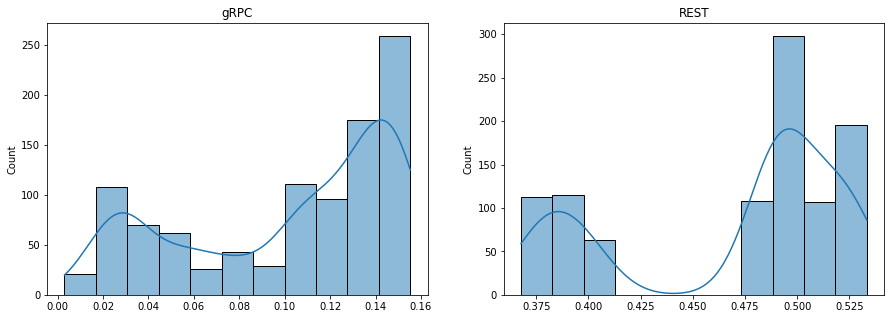

In [23]:
fig, ax = plt.subplots(1, 2, figsize=(15,5))
_ = sns.histplot(data=pd.Series(np.load('resp_1000.npy')), kde=True, ax=ax[0])
ax[0].set_title("gRPC")
_ = sns.histplot(data=pd.Series(np.load('/home/ubuntu/infer/client_rest/data/resp_1000.npy')), kde=True, ax=ax[1])
ax[1].set_title("REST")


Text(0.5, 1.0, 'REST')

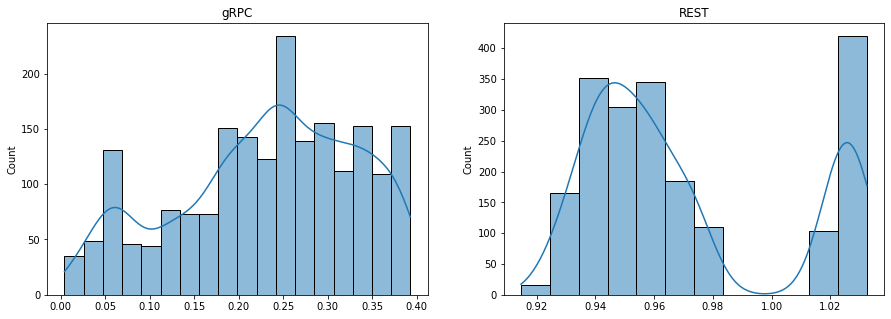

In [24]:
fig, ax = plt.subplots(1, 2, figsize=(15,5))
_ = sns.histplot(data=pd.Series(np.load('resp_2000.npy')), kde=True, ax=ax[0])
ax[0].set_title("gRPC")
_ = sns.histplot(data=pd.Series(np.load('/home/ubuntu/infer/client_rest/data/resp_2000.npy')), kde=True, ax=ax[1])
ax[1].set_title("REST")


Text(0.5, 1.0, 'REST')

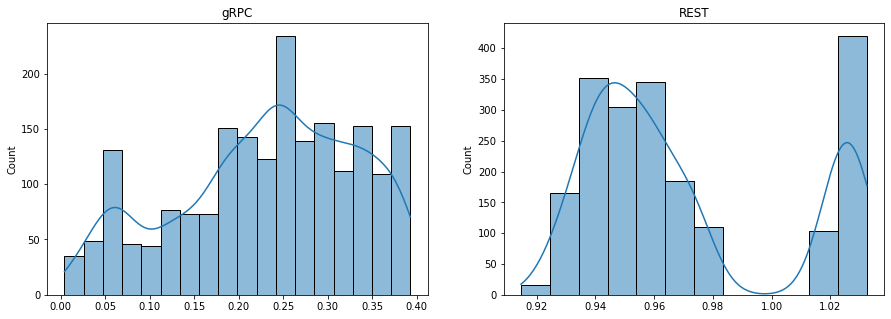

In [25]:
fig, ax = plt.subplots(1, 2, figsize=(15,5))
_ = sns.histplot(data=pd.Series(np.load('resp_2000.npy')), kde=True, ax=ax[0])
ax[0].set_title("gRPC")
_ = sns.histplot(data=pd.Series(np.load('/home/ubuntu/infer/client_rest/data/resp_2000.npy')), kde=True, ax=ax[1])
ax[1].set_title("REST")


In [27]:
pd.Series(np.load('/home/ubuntu/infer/client_rest/data/resp_2000.npy')).describe()

count    2000.000000
mean        0.970677
std         0.034822
min         0.914687
25%         0.943220
50%         0.957549
75%         1.019857
max         1.032442
dtype: float64

In [28]:
pd.Series(np.load('/home/ubuntu/infer/client_rest/data/resp_1000.npy')).describe()

count    1000.000000
mean        0.469395
std         0.055099
min         0.367679
25%         0.400999
50%         0.492531
75%         0.510324
max         0.533403
dtype: float64

Text(0.5, 1.0, 'REST')

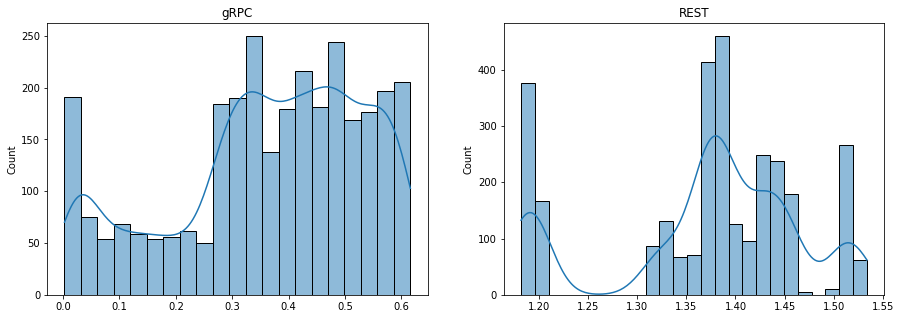

In [29]:
fig, ax = plt.subplots(1, 2, figsize=(15,5))
_ = sns.histplot(data=pd.Series(np.load('resp_3000.npy')), kde=True, ax=ax[0])
ax[0].set_title("gRPC")
_ = sns.histplot(data=pd.Series(np.load('/home/ubuntu/infer/client_rest/data/resp_3000.npy')), kde=True, ax=ax[1])
ax[1].set_title("REST")


In [34]:
grpc_2k = pd.Series(np.load('/home/ubuntu/infer/client_grpc/data/resp_2000.npy'))
rest_2k = pd.Series(np.load('/home/ubuntu/infer/client_rest/data/resp_2000.npy'))

In [35]:
pd.DataFrame({'grpc': grpc_2k, 'rest': rest_2k}).describe()

,grpc,rest
count,2000.000000,2000.000000
mean,0.232253,0.970677
std,0.100517,0.034822
min,0.004227,0.914687
25%,0.169976,0.943220
50%,0.244533,0.957549
75%,0.311939,1.019857
max,0.392808,1.032442


# Notes
Testing benchmarking tools REST and gRPC
Apache bench (tool) Performance testing tool

## Open issues:
- Performance at low level layers
- 3KB size of inference
- traffic patterns?
- Bottlenecks in the system (CPU bound or IO bound)
- Is caching being used in the server ?
- Any effect of Schema ?

Next task meeting in 24th January 2022
Next WP deadline March 2022


### Comparing requests from VM and Container

In [3]:
reqs_vm = pd.read_csv('response_times_vm.csv', index_col='Unnamed: 0')
reqs_container = pd.read_csv('response_times_container.csv', index_col='Unnamed: 0')

In [4]:
reqs_vm.describe()

,100,200,300,500,1000,1500,2000,2500,3000,3500,4000
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,9914.000000,10000.000000,9898.000000,9851.000000,10000.000000,9841.000000
mean,0.050657,0.113574,0.164483,0.271756,0.493999,0.672205,0.791852,1.144912,1.266589,0.869787,1.286618
std,0.008376,0.016420,0.024595,0.045898,0.142086,0.235366,0.348033,0.454171,0.447796,0.463830,0.575237
min,0.004903,0.003374,0.003076,0.002903,0.002727,0.002625,0.003910,0.002627,0.002553,0.003187,0.002517
25%,0.044607,0.108635,0.158656,0.265170,0.467888,0.521067,0.467135,0.783591,0.938036,0.506591,0.883076
50%,0.050391,0.115082,0.165070,0.283052,0.557171,0.738723,0.947111,1.363870,1.504087,0.846180,1.418692
75%,0.056857,0.121674,0.173279,0.293477,0.579724,0.854606,1.089451,1.490838,1.563638,1.281002,1.767168
max,0.114987,0.245658,0.322006,0.564554,1.032681,1.018182,1.465100,2.098819,1.985160,1.734974,2.185071


In [5]:
reqs_container.describe()

,100,200,300,500,1000,1500,2000,2500,3000,3500,4000
count,10000.000000,10000.000000,10000.000000,10000.000000,9998.000000,10000.000000,10000.000000,10000.000000,8904.000000,10000.000000,10000.000000
mean,0.064022,0.118411,0.198250,0.315451,0.570490,0.785199,1.019847,1.234756,1.298434,1.399309,1.381068
std,0.007913,0.017237,0.030484,0.054627,0.167761,0.292919,0.381808,0.515102,0.611921,0.659836,0.625625
min,0.006113,0.002290,0.002509,0.002615,0.003218,0.003457,0.002414,0.003169,0.002396,0.002830,0.003443
25%,0.059666,0.108340,0.188942,0.312152,0.525887,0.636892,0.843223,0.817839,0.771035,0.903751,0.953389
50%,0.064251,0.119156,0.205008,0.329451,0.605099,0.899020,1.179867,1.488701,1.279720,1.574955,1.459003
75%,0.068027,0.128610,0.213508,0.342176,0.704655,1.036592,1.300866,1.684568,1.917972,1.981447,1.967300
max,0.141941,0.224425,0.423143,0.679344,1.130197,1.087820,1.846998,1.911393,2.569409,2.610493,2.282029


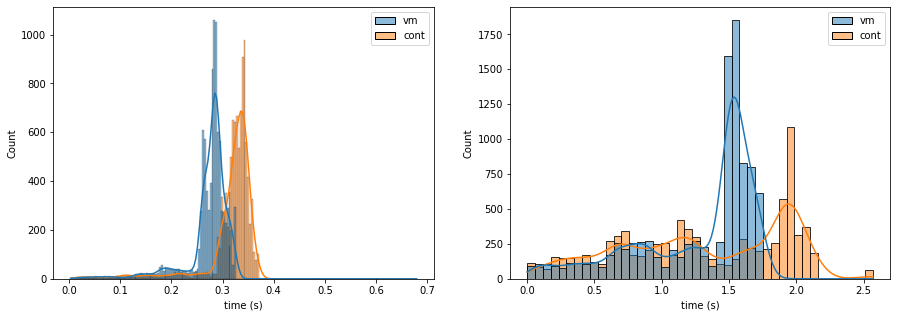

In [23]:
fig, ax = plt.subplots(1, 2, figsize=(15,5))
_ = sns.histplot(data={'vm':reqs_vm['500'], 'cont':reqs_container['500']}, kde=True, ax=ax[0], color='orange', label='vm')
_ = sns.histplot(data={'vm':reqs_vm['3000'], 'cont':reqs_container['3000']}, kde=True, ax=ax[1], color='orange', label='vm')
_ = ax[0].set_xlabel('time (s)')
_ = ax[1].set_xlabel('time (s)')

# Using a container inside the VM creates some extra latency